<a href="https://colab.research.google.com/github/schumbar/CMPE258/blob/chumbar%2Fassignment_03/assignment_03/CMPE258_assignment03_part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 03 Part B - Hugging Face

## Assignment Description

Perform the following tasks:

### Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install transformers[sentencepiece]
!pip install wikipedia-api
!pip install optimum
!pip install sacremoses
!pip install transformers
!pip install torch
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.1/407.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.3 MB/s eta 0:00:00


In [61]:
from transformers import DetrFeatureExtractor, DetrForObjectDetection, Wav2Vec2ForCTC, Wav2Vec2Tokenizer
from transformers import pipeline, ResNetForImageClassification
from optimum.exporters.tasks import TasksManager
import matplotlib.pyplot as plt
from torchvision import models, transforms
from scipy.io import wavfile
from IPython.display import Audio
import soundfile as sf
import wikipediaapi
from PIL import Image
from io import BytesIO
import pandas as pd
import numpy as np
import textwrap
import requests
import librosa
import torch
import gc

## Text-related Tasks

### Text Classification


In [5]:
text = """I must say that you are truly an absolute stupid human being. I have never met someone so incredibly stupid \
and dumb. If you were any dumber, I would call you mr. dumb dumb."""

In [6]:
wrapper = textwrap.TextWrapper(width=80, break_long_words=False, break_on_hyphens=False)
print(wrapper.fill(text))

I must say that you are truly an absolute stupid human being. I have never met
someone so incredibly stupid and dumb. If you were any dumber, I would call you
mr. dumb dumb.


In [7]:
sentiment_pipeline = pipeline('text-classification')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [8]:
sentiment_pipeline(text)

[{'label': 'NEGATIVE', 'score': 0.9990277290344238}]

### Named Entity Recognition

In [9]:
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER")

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [10]:
ner_text = """
In 2021, Elon Musk's company SpaceX launched the Falcon Heavy rocket from Kennedy Space Center in Florida. \
This event was attended by notable figures including the President of the United States, Joe Biden, and the CEO of Microsoft, Satya Nadella. \
Meanwhile, in Paris, the Louvre Museum announced a new exhibition of works by the famous artist Leonardo da Vinci, scheduled for July 2023. \
Across the Atlantic, the University of Cambridge received a generous donation of £20 million from philanthropist Bill Gates for medical research. \
In the world of sports, Serena Williams won her 23rd Grand Slam at the Australian Open, while Lionel Messi transferred to Paris Saint-Germain from Barcelona FC. \
On the technology front, Google announced its latest smartphone, the Pixel 6, in a virtual event hosted from their headquarters in Mountain View, California. \
Elsewhere, the Nobel Prize in Physics for 2022 was awarded to Dr. Jennifer Doudna for her groundbreaking work in CRISPR gene editing.
"""

In [11]:
def print_entity_details(entities):
    for entity in entities:
        print(f"EntityGroup: {entity['entity_group']} \tScore: {entity['score']:.2f} \tWord: {entity['word']}")

In [12]:
entities = ner_pipeline(ner_text, aggregation_strategy="simple")

In [13]:
print_entity_details(entities)

EntityGroup: ORG 	Score: 0.99 	Word: Elon Musk
EntityGroup: ORG 	Score: 1.00 	Word: SpaceX
EntityGroup: MISC 	Score: 0.67 	Word: Falcon Heavy
EntityGroup: LOC 	Score: 1.00 	Word: Kennedy Space Center
EntityGroup: LOC 	Score: 1.00 	Word: Florida
EntityGroup: LOC 	Score: 1.00 	Word: United States
EntityGroup: PER 	Score: 0.99 	Word: Joe Biden
EntityGroup: ORG 	Score: 1.00 	Word: Microsoft
EntityGroup: PER 	Score: 1.00 	Word: Sa
EntityGroup: PER 	Score: 0.91 	Word: ##ty
EntityGroup: PER 	Score: 0.87 	Word: ##a Nadella
EntityGroup: LOC 	Score: 1.00 	Word: Paris
EntityGroup: LOC 	Score: 0.90 	Word: Lou
EntityGroup: LOC 	Score: 0.94 	Word: ##vre Museum
EntityGroup: PER 	Score: 1.00 	Word: Leonardo da Vinci
EntityGroup: LOC 	Score: 0.97 	Word: Atlantic
EntityGroup: ORG 	Score: 1.00 	Word: University of Cambridge
EntityGroup: PER 	Score: 1.00 	Word: Bill Gates
EntityGroup: PER 	Score: 1.00 	Word: Serena Williams
EntityGroup: MISC 	Score: 1.00 	Word: Grand Slam
EntityGroup: MISC 	Score: 1.00 	W

### Question Answering

In [14]:
page_title = "Transformer (machine learning model)"

In [15]:
USER_AGENT = "CMPE258-Assignment03/1.0 (schumbar@ucsc.edu)"
def get_wikipedia_page(page_title):
    # Initialize Wikipedia API with the custom user agent
    wiki_wiki = wikipediaapi.Wikipedia(language='en', user_agent=USER_AGENT)
    page = wiki_wiki.page(page_title)
    return page

In [16]:
page = get_wikipedia_page(page_title)
text = page.text

In [17]:
text_cleaned = text.replace("  ", " ")

In [18]:
print(text_cleaned)

A transformer is a deep learning architecture based on the multi-head attention mechanism, proposed in a 2017 paper "Attention Is All You Need". It has no recurrent units, and thus requires less training time than previous recurrent neural architectures, such as long short-term memory (LSTM), and its later variation has been prevalently adopted for training large language models (LLM) on large (language) datasets, such as the Wikipedia corpus and Common Crawl.
Text is converted to numerical representations called tokens, and each token is converted into a vector via looking up from a word embedding table. At each layer, each token is then contextualized within the scope of the context window with other (unmasked) tokens via a parallel multi-head attention mechanism allowing the signal for key tokens to be amplified and less important tokens to be diminished. The transformer paper, published in 2017, is based on the softmax-based attention mechanism proposed by Bahdanau et. al. in 2014 

In [19]:
qa_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [20]:
def get_answer(output):
  return output['answer']

In [21]:
def qa(question):
  outputs = qa_pipeline(question=question, context=text_cleaned)
  qa_string = f"Q: {question}\nA: {get_answer(outputs)}"
  return qa_string


In [22]:
question = "What year was the IBM alignment models used for statistical machine translation?"

In [23]:
print(qa(question))

Q: What year was the IBM alignment models used for statistical machine translation?
A: 1993


### Text Summarization

In [24]:
summarization_pipeline = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [25]:
text_to_summarize = """
The Future of Renewable Energy

In the 21st century, renewable energy has become a pivotal part of the global energy conversation.
As concerns about climate change and environmental degradation grow, the shift towards renewable energy sources such as solar, wind, hydro, and geothermal has accelerated.
This transition not only addresses environmental concerns but also presents economic opportunities and challenges in energy security.

The advancements in solar and wind technologies have led to a significant reduction in their costs, making them more competitive with traditional fossil fuels.
Countries around the world are investing in these technologies, recognizing their potential to create jobs, reduce greenhouse gas emissions, and ensure a more sustainable future.
However, the intermittent nature of solar and wind energy presents challenges in energy storage and grid management.

Hydroelectric power, while not without its environmental impacts, continues to be a major renewable source, particularly in regions with abundant water resources.
Geothermal energy, though less widespread, offers a consistent and reliable source of energy in certain geographical areas.

The integration of renewable energy into national and global grids requires substantial investment in infrastructure and a shift in energy policies.
The transition also necessitates the development of efficient energy storage systems to manage supply and demand effectively.

Despite these challenges, the future of renewable energy is promising.
With continued innovation and commitment from governments and the private sector, renewable energy has the potential to significantly reduce our dependence on fossil fuels and mitigate the impacts of climate change.
This era of energy transformation is not just about technological advancement, but also about the societal and economic shifts necessary to embrace a more sustainable and cleaner energy future.
"""


In [26]:
outputs = summarization_pipeline(text_to_summarize, max_length=100, clean_up_tokenization_spaces=True)
print(wrapper.fill(outputs[0]['summary_text']))

 The Future of Renewable Energy has become a pivotal part of the global energy
conversation. Solar, wind, hydro, and geothermal energy has become more
competitive with traditional fossil fuels. The integration of renewable energy
into national and global grids requires substantial investment in infrastructure
and a shift in energy policies.


### Translation

In [27]:
model = "Helsinki-NLP/opus-mt-en-es"

In [28]:
translator = pipeline("translation", model=model)

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

In [29]:
translation_text = "Hello, how are you doing today? I love you!"

In [30]:
def translate(translation_text):
  translation_output = translator(translation_text, clean_up_tokenization_spaces=True, min_length=10)
  translated_text = translation_output[0]['translation_text']
  translation_string = f"Orig Text: \t{translation_text}\nTranslation: \t{translated_text}"
  return translation_string


In [31]:
print(translate(translation_text))

Orig Text: 	Hello, how are you doing today? I love you!
Translation: 	Hola, ¿cómo estás hoy? ¡Te quiero!


### Zero-shot Classification

In [32]:
news_categories = [
    "Politics",
    "Business",
    "Technology",
    "Entertainment",
    "Sports",
    "World",
    "Lifestyle",
    "Health",
    "Science",
    "Opinion"
]

In [33]:
news_headlines = [
    "Government Announces New Climate Policy Amidst Rising Concerns",
    "Tech Giant Unveils Latest Smartphone with Groundbreaking Features",
    "Major Studio Releases Trailer for Highly Anticipated Superhero Movie",
    "Central Bank Raises Interest Rates in Response to Inflation Fears",
    "Renowned Scientist Wins Nobel Prize for Breakthrough in Quantum Computing",
    "National Team Secures Victory in World Cup Qualifier Match",
    "Global Leaders Meet to Discuss Strategies for Sustainable Development",
    "New Study Reveals the Impact of Diet and Exercise on Longevity",
    "Celebrity Chef Opens a New Fusion Cuisine Restaurant in Downtown",
    "Editorial: The Role of Social Media in Modern Democracy"
]

In [34]:
answers = [
    "Politics",          # Government Announces New Climate Policy Amidst Rising Concerns
    "Technology",        # Tech Giant Unveils Latest Smartphone with Groundbreaking Features
    "Entertainment",     # Major Studio Releases Trailer for Highly Anticipated Superhero Movie
    "Business",          # Central Bank Raises Interest Rates in Response to Inflation Fears
    "Science",           # Renowned Scientist Wins Nobel Prize for Breakthrough in Quantum Computing
    "Sports",            # National Team Secures Victory in World Cup Qualifier Match
    "World",             # Global Leaders Meet to Discuss Strategies for Sustainable Development
    "Health",            # New Study Reveals the Impact of Diet and Exercise on Longevity
    "Lifestyle",         # Celebrity Chef Opens a New Fusion Cuisine Restaurant in Downtown
    "Opinion"            # Editorial: The Role of Social Media in Modern Democracy
]


In [35]:
zero_shot_classifier = pipeline("zero-shot-classification",
                                model="vicgalle/xlm-roberta-large-xnli-anli")

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [36]:
# Function to run the classifier on each headline
def classify_headlines(headlines, categories):
    for i, headline in enumerate(headlines):
        # Running the classifier
        result = zero_shot_classifier(headline, categories)
        # Extracting the top prediction
        top_prediction = result["labels"][0]
        print(f"Prediction: {top_prediction}, \tExpected: {answers[i]}, \tHeadline: '{headline}'\n")

In [37]:
classify_headlines(news_headlines, news_categories)

Prediction: Politics, 	Expected: Politics, 	Headline: 'Government Announces New Climate Policy Amidst Rising Concerns'

Prediction: Technology, 	Expected: Technology, 	Headline: 'Tech Giant Unveils Latest Smartphone with Groundbreaking Features'

Prediction: Entertainment, 	Expected: Entertainment, 	Headline: 'Major Studio Releases Trailer for Highly Anticipated Superhero Movie'

Prediction: Opinion, 	Expected: Business, 	Headline: 'Central Bank Raises Interest Rates in Response to Inflation Fears'

Prediction: Science, 	Expected: Science, 	Headline: 'Renowned Scientist Wins Nobel Prize for Breakthrough in Quantum Computing'

Prediction: Sports, 	Expected: Sports, 	Headline: 'National Team Secures Victory in World Cup Qualifier Match'

Prediction: World, 	Expected: World, 	Headline: 'Global Leaders Meet to Discuss Strategies for Sustainable Development'

Prediction: Science, 	Expected: Health, 	Headline: 'New Study Reveals the Impact of Diet and Exercise on Longevity'

Prediction: Busi

### Clean CPU Cache

In [38]:
list_of_var_names = [
    'USER_AGENT',
    'answers',
    'entities',
    'model',
    'ner_pipeline',
    'ner_text',
    'news_categories',
    'news_headlines',
    'outputs',
    'page',
    'page_title',
    'qa_pipeline',
    'qa_string',
    'question',
    'result',
    'sentiment_pipeline',
    'summarization_pipeline',
    'text',
    'text_cleaned',
    'text_to_summarize',
    'top_prediction',
    'translated_text',
    'translation_output',
    'translation_string',
    'translation_text',
    'translator',
    'wiki_wiki',
    'wrapper',
    'zero_shot_classifier'
  ]

In [39]:
def garbage_collect_variables(variable_names):
    for name in variable_names:
        if name in globals():
            # Delete the variable
            del globals()[name]
    # Run the garbage collector
    gc.collect()


In [40]:
garbage_collect_variables(list_of_var_names)

## Other Task Types

### Computer Vision

In [41]:
image_classification_pipeline = pipeline("image-classification", model="microsoft/resnet-50")

config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [42]:
# URL of the image
image_url = "https://raw.githubusercontent.com/schumbar/CMPE258/main/assignment_03/tumblr_moveast.jpg"

# Download the image using requests
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Specify the path in your Google Drive where you want to save the image
# Replace 'My Drive/MyFolder/my_image.jpg' with your desired path
save_path = '/content/drive/My Drive/tumblr_moveast.jpg'

# Save the image to the specified path
image.save(save_path)

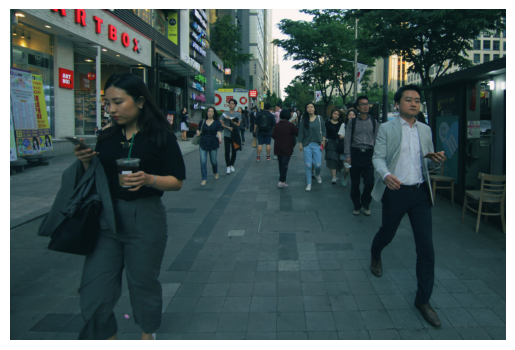

In [43]:
# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [44]:
# Load the pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 94.1MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [45]:
# Define the image transformations (required by ResNet-50)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [46]:
# Open the image from your Google Drive
image = Image.open(save_path)

In [47]:
# Preprocess the image
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Create a mini-batch as expected by the model

In [48]:
# Check if a GPU is available and if not, use a CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
input_batch = input_batch.to(device)

In [49]:
# Perform inference
with torch.no_grad():
    output = model(input_batch)

In [50]:
# Decode the predictions
_, predicted = torch.max(output, 1)

In [51]:
# Load the ResNet-50 model
model = ResNetForImageClassification.from_pretrained('microsoft/resnet-50')
model.eval()  # Set the model to evaluation mode

# Load and preprocess the image
image_path = '/content/drive/My Drive/tumblr_moveast.jpg'
image = Image.open(image_path)

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Create a mini-batch as expected by the model

# Check if a GPU is available and if not, use a CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_batch = input_batch.to(device)
model.to(device)

# Analyze the image
with torch.no_grad():
    output = model(input_batch)
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output.logits, dim=1)

# Retrieve the most likely result
top_prob, top_catid = torch.topk(probabilities, 1)
print(top_prob, top_catid)


tensor([[0.1460]], device='cuda:0') tensor([[829]], device='cuda:0')


In [52]:
url = "https://raw.githubusercontent.com/schumbar/CMPE258/main/assignment_03/tumblr_moveast.jpg"
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = DetrFeatureExtractor.from_pretrained('facebook/detr-resnet-101-dc5')
model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-101-dc5')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/detr/feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json:   0%|          | 0.00/4.38k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/243M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/179M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-101-dc5 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [53]:
print(logits)

tensor([[[-11.5049,   0.4798,  -3.2942,  ...,  -4.2119,  -4.2782,   5.6010],
         [-13.5888,   4.6715,  -2.3520,  ...,  -4.0219,  -6.0698,   6.0645],
         [-11.8564,   1.7370,  -1.4193,  ...,  -4.7305,  -4.6414,   6.6023],
         ...,
         [-11.0781,   1.4772,   0.9946,  ...,  -5.9722, -11.6760,   5.1833],
         [-11.8250,   1.9562,  -1.0920,  ...,  -3.5957,  -5.0641,   6.3145],
         [-10.8091,   7.5780,  -0.5600,  ...,  -5.4923,  -3.1408,   6.2572]]],
       grad_fn=<ViewBackward0>)


In [54]:
print(bboxes)

tensor([[[0.6773, 0.4732, 0.0188, 0.0381],
         [0.8296, 0.3262, 0.0244, 0.0566],
         [0.3875, 0.3734, 0.0377, 0.0930],
         [0.8746, 0.4436, 0.0209, 0.0243],
         [0.6314, 0.4140, 0.0137, 0.0361],
         [0.5119, 0.3727, 0.0469, 0.1752],
         [0.2838, 0.5253, 0.0147, 0.0254],
         [0.2071, 0.5906, 0.2950, 0.8027],
         [0.3545, 0.3283, 0.0107, 0.0290],
         [0.1416, 0.4058, 0.0410, 0.0417],
         [0.4565, 0.3381, 0.0164, 0.0182],
         [0.3639, 0.3496, 0.0157, 0.0288],
         [0.4611, 0.3573, 0.0254, 0.0804],
         [0.3939, 0.3776, 0.0483, 0.0962],
         [0.4833, 0.5475, 0.8289, 0.3953],
         [0.7146, 0.3558, 0.0507, 0.0720],
         [0.7154, 0.3624, 0.0493, 0.0898],
         [0.5377, 0.3091, 0.0163, 0.0450],
         [0.6568, 0.3834, 0.0296, 0.1061],
         [0.6775, 0.4838, 0.0183, 0.0494],
         [0.1295, 0.6279, 0.1223, 0.2361],
         [0.6064, 0.4078, 0.0486, 0.2236],
         [0.4573, 0.3780, 0.0327, 0.1698],
         [0

### Audio

In [62]:
file_name = '/content/drive/MyDrive/Spring2024/CMPE258/Assignment03/data/part_b/chumbar_recording.wav'

In [63]:
Audio(file_name)

In [64]:
data=wavfile.read(file_name)

In [65]:
framerate = data[0]
sound_data = data[1]

In [66]:
time=np.arange(0, len(sound_data))/framerate
print(framerate)
print('Length of recording: ', len(sound_data)/framerate)

44100
Length of recording:  7.987664399092971


In [67]:
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:733: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You sho

In [68]:
input_audio, _ = librosa.load(file_name, sr=16000)
input_values = tokenizer(input_audio, return_tensors="pt").input_values

In [69]:
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
text = tokenizer.batch_decode(predicted_ids)[0]

In [70]:
Audio(file_name)

In [71]:
print("Model Generated Text: ", text)

Model Generated Text:  HALLO MY NAME IS SHAN CHUMBAR AND THIS IS MY CLASS ASSIGNMENT


### Table QA

Dataset Link: [Superbowl History 1967-2020](https://www.kaggle.com/datasets/timoboz/superbowl-history-1967-2020)

In [72]:
df = pd.read_csv("/content/drive/MyDrive/Spring2024/CMPE258/Assignment03/data/part_b/superbowl.csv")
df = df.astype(str)

In [73]:
df
df.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


In [74]:
columns_to_drop = ['Winner Pts', 'Loser', 'Loser Pts', 'Stadium', 'City', 'State', 'Date', 'SB']
df = df.drop(columns=columns_to_drop)


In [75]:
df = df.rename(columns={'Winner': 'winning team', 'MVP': 'Most Valuable Player'})

In [76]:
# Find the team with the most Super Bowl wins
most_winning_team = df['winning team'].value_counts().idxmax()
# Find the player with the most Super Bowl MVP awards
most_mvp_awards_player = df['Most Valuable Player'].value_counts().idxmax()
# Find the teams the most MVP player has played for in the Super Bowls
teams_player_played_for = df[df['Most Valuable Player'] == most_mvp_awards_player]['winning team'].unique()
most_winning_team, most_mvp_awards_player, teams_player_played_for.tolist()

('Pittsburgh Steelers', 'Tom Brady', ['New England Patriots'])

In [77]:
expected_1 = most_winning_team
expected_2 = most_mvp_awards_player
expected_3 = teams_player_played_for.tolist()

In [78]:
table_qa = pipeline("table-question-answering", model="google/tapas-large-finetuned-wtq")

config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/490 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/262k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

In [79]:
def get_answer(query, expected):
  answer = table_qa(table=df, query=query)['answer']
  output_str = f"Q: {query} \nAns: {answer} \nExpected: {expected}"
  return output_str

In [80]:
query_1 = "Which team has won the most superbowls?"
query_2 = "What player has the most superblowl Most Valuable Player awards?"
query_3 = "Which team does he play for?"

In [81]:
ans = get_answer(query_1, expected_1)
print(ans)

Q: Which team has won the most superbowls? 
Ans: Dallas Cowboys 
Expected: Pittsburgh Steelers


In [82]:
ans = get_answer(query_2, expected_2)
print(ans)

Q: What player has the most superblowl Most Valuable Player awards? 
Ans: Bart Starr+ 
Expected: Tom Brady


In [83]:
ans = get_answer(query_3, expected_3)
print(ans)

Q: Which team does he play for? 
Ans: Denver Broncos 
Expected: ['New England Patriots']


# Conclusion
In this assignment, we have used the hugging face APIs to perform the following Text-related tasks actions:
1. Text Classification
2. Named entity Recognition
3. Question Answering
4. Text Summarization
5. Translation
6. Zero-shot classification

We then performed other task types, such as the following:
1. Computer Vision
2. Audio
3. TableQA
